<a href="https://colab.research.google.com/github/Aakash3708/Handwritten-Text-Recognition/blob/main/Handwritten-Text-Recognition-OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Saving Test6.jpg to Test6.jpg


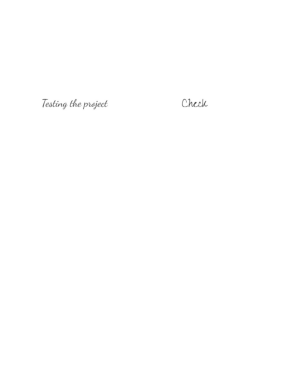

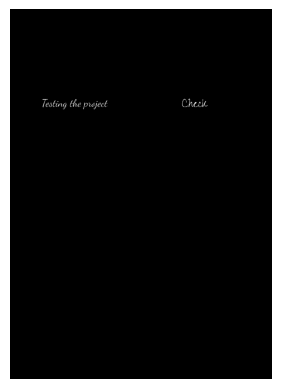

Extracted Text:
Testing the project Cra



In [ ]:
# Step 1: Setup Environment
!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless
!pip install pdf2image

import cv2
import pytesseract
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

# Set the path for pytesseract to locate the Tesseract OCR executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Step 2: Upload Images and PDFs
uploaded = files.upload()

# Step 3: Process Uploaded Files
for filename in uploaded.keys():
    if filename.lower().endswith('.pdf'):
        # Convert PDF to images
        images = convert_from_path(filename)
        for i, img in enumerate(images):
            # Process each page of the PDF
            img_cv = np.array(img)
            plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Page {i + 1}')
            plt.show()

            # Preprocess and extract text
            gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
            _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
            plt.imshow(binary, cmap='gray')
            plt.axis('off')
            plt.show()
            text = pytesseract.image_to_string(binary, lang='eng')
            print(f"Extracted Text from Page {i + 1}:")
            print(text)

    elif filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Process image files
        img = Image.open(filename)
        img_cv = np.array(img)

        plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Preprocess and extract text
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
        plt.imshow(binary, cmap='gray')
        plt.axis('off')
        plt.show()
        text = pytesseract.image_to_string(binary, lang='eng')
        print("Extracted Text:")
        print(text)

